In [1]:
# set up

from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

## Analytic methods

if we know parameters of sampling distribution, CI and p-values calculate analytically (since faster)

In [5]:
import scipy.stats

def EvalNormalCdfInverse(p, mu=0, sigma=1):
    return scipy.stats.norm.ppf(p, loc=mu, scale=sigma)

# CI for estimated mean (90 kg gorilla weight)

CiLow = EvalNormalCdfInverse(0.05, mu=90, sigma=2.5)

CiHigh = EvalNormalCdfInverse(0.95, mu=90, sigma=2.5)
print(CiLow, CiHigh)

85.88786593262132 94.11213406737868


# 14.2 Normal Distribution

'closed' in linear transformation and in addition

x ~ N(mu, sigma**2)

In [6]:
from normal import Normal

#distribution with mean 90kg and variance  7.5kg
dist = Normal(90, 7.5**2)
dist


Normal(90, 56.25)

In [7]:
dist_xbar = dist.Sum(9) /9
dist_xbar.sigma

2.5

In [8]:
# Confidence Interval 

dist_xbar.Percentile(5), dist_xbar.Percentile(95)

(85.88786593262132, 94.11213406737868)

## Central Limit Theorem

add up indep. vairates from a distribution (same) with finite mean and variance, the sum converges on a normal distribution


### 14.5 Testing the CLT

In [15]:
def MakeExpoSamples(beta=2.0, iters=1000):
    """Generates samples from an exponential distribution.

    beta: parameter
    iters: number of samples to generate for each size

    returns: list of samples
    """
    samples = []
    for n in [1, 10, 100]:
        sample = [np.sum(np.random.exponential(beta, n))
                 for _ in range(iters)]
        samples.append((n, sample))
    return samples


In [17]:

#This function generates normal probability
#plots for samples with various sizes.

def NormalPlotSamples(samples, plot=1, ylabel=''):
    """Makes normal probability plots for samples.

    samples: list of samples
    label: string
    """
    for n, sample in samples:
        thinkplot.SubPlot(plot)
        thinkstats2.NormalProbabilityPlot(sample)

        thinkplot.Config(title='n=%d' % n,
                         legend=False,
                         xticks=[],
                         yticks=[],
                         xlabel='random normal variate',
                         ylabel=ylabel)
        plot += 1

C:\Users\ansve\Coding\Think Stats 2\code\thinkplot.py:182: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return plt.subplot(rows, cols, plot_number, **options)


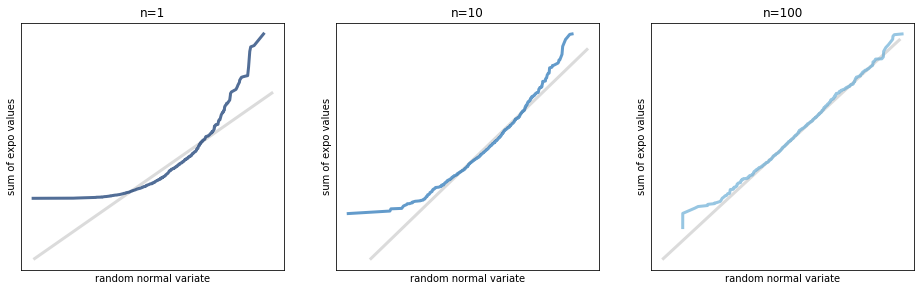

In [18]:
thinkplot.PrePlot(num=3, rows=2, cols=3)
samples = MakeExpoSamples()
NormalPlotSamples(samples, plot=1,
                  ylabel='sum of expo values')

In [21]:
### lognormal distr. higher variance -> requires larger sample

def MakeLognormalSamples(mu=1.0, sigma=1.0, iters=1000):
    """Generates samples from a lognormal distribution.

    mu: parmeter
    sigma: parameter
    iters: number of samples to generate for each size

    returns: list of samples
    """
    samples = []
    
    for n in [1, 10, 100]:
        sample = [np.sum(np.random.lognormal(mu, sigma, n)) 
                 for _ in range(1000)]
        samples.append((n, sample))
    return samples

C:\Users\ansve\Coding\Think Stats 2\code\thinkplot.py:182: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return plt.subplot(rows, cols, plot_number, **options)


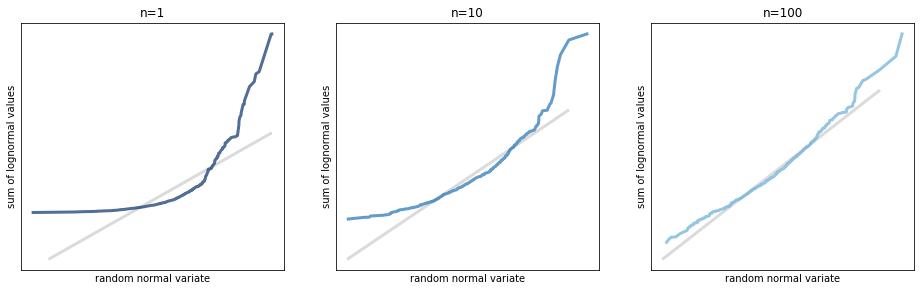

In [22]:
thinkplot.PrePlot(num=3, rows=2, cols=3)
samples = MakeLognormalSamples()
NormalPlotSamples(samples, ylabel='sum of lognormal values')

## Pareto Distr.

not possible since no finite mean / variance - doesn't converge to normal

## Correlated Expo. Distribution

even though against the CLT assumptions, in practice only slight problem without relevance

### 14.6 Applying the CLT

### Difference in Means

pregnancy length not normal 

but mean ( or sum ) of a few thousand samples is very close to normal

In [24]:
import first

live, firsts, others = first.MakeFrames()
delta = firsts.prglngth.mean() - others.prglngth.mean()
# difference in mean length of pregnancy
delta

0.07803726677754952

In [27]:
def SamplingDistMean(data, n):
    """Computes the sampling distribution of the mean.

    data: sequence of values representing the population
    n: sample size

    returns: Normal object
    """
    mean, var = data.mean(), data.var()
    dist = Normal(mean, var)
    return dist.Sum(n) / n

In [30]:
dist1 = SamplingDistMean(live.prglngth, len(firsts))
dist2 = SamplingDistMean(live.prglngth, len(others))

dist_diff = dist1 - dist2
dist

Normal(90, 56.25)

In [ ]:
### Correlation 